<a href="https://colab.research.google.com/github/shiernee/Getting_Started_with_AI_Tutorial/blob/main/AI_Workshop_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Classification of Breast cancer data with Artificial Neural Networks**

Let's build a artificial neural network (ANN) classifier to classify type of breast cancer.

#1. Import Data

In [ ]:
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

from sklearn import datasets

breast_data = datasets.load_breast_cancer()


In [ ]:
X = breast_data.data
y = breast_data.target


In [ ]:
breast_data.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
breast_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (381, 30)
X_test shape:  (188, 30)


In [ ]:
# model building
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
# Model Evaluation
from sklearn import metrics

print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.9627659574468085


# **Part 2: Classification of MNIST Dreams with Convolutional Neural Networks**

Let's build a convolutional neural network (CNN) classifier to classify images of handwritten digits in the MNIST dataset with a twist where we test our classifier on high-resolution hand-written digits from outside the dataset.

## 1. Import Data

In [ ]:
# from sklearn.datasets import fetch_openml

# mnist = fetch_openml('mnist_784', cache=False)
# X = mnist.data.astype('float32') # image
# y = mnist.target.astype('int64')  # label

import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

image width:  28
image height:  28


Text(0.5, 1.0, '2')

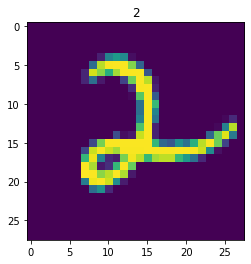

In [ ]:
# randomly view datasets
# re-execute the cell to view other datasets
import matplotlib.pyplot as plt
import numpy as np

index = np.random.randint(0,len(X))

# img_to_show = X.iloc[index].to_numpy()
# w, h = int(np.sqrt(len(img_to_show))), int(np.sqrt(len(img_to_show)))
# print('image width: ', w)
# print('image height: ', h)
# img_to_show = np.reshape(img_to_show, [w, h])
# plt.imshow(img_to_show)
# plt.title(y[index])

img_to_show = X_train[index]  # get one of the X_train image
plt.imshow(img_to_show)  # plot the image
plt.title(y_train[index])  # this is to show the label of that image we obtained

# 2. Data Splitting


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# skip the following as we have already split them in the previous code.
# (train_images_load, train_labels_load), (test_images_load, test_labels_load) = keras.datasets.mnist.load_data()

# copy the following line
(train_images_load, train_labels_load), (test_images_load, test_labels_load) = mnist.load_data()


# reshape images to specify that it's a single channel
train_images_load = train_images_load.reshape(train_images_load.shape[0], 28, 28, 1)
test_images_load = test_images_load.reshape(test_images_load.shape[0], 28, 28, 1)

# Takes only the first 10000 training data and 6000 testing data due to limited computational resources

no_train = 10000
no_test = 6000

train_images = train_images_load[:no_train]
train_labels = train_labels_load[:no_train]
test_images = test_images_load[:no_test]
test_labels = test_labels_load[:no_test]


11490434/11490434 [==============================] - 0s 0us/step


We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [ ]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Display the first 5 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

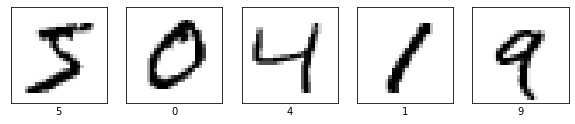

In [ ]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

## 3. Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

In [ ]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [ ]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4. Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [ ]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
313/313 [==============================] - 34s 102ms/step - loss: 0.4479 - accuracy: 0.8645
Epoch 2/5
313/313 [==============================] - 30s 96ms/step - loss: 0.1654 - accuracy: 0.9513
Epoch 3/5
313/313 [==============================] - 30s 97ms/step - loss: 0.1172 - accuracy: 0.9650
Epoch 4/5
313/313 [==============================] - 30s 96ms/step - loss: 0.0927 - accuracy: 0.9713
Epoch 5/5
313/313 [==============================] - 30s 96ms/step - loss: 0.0723 - accuracy: 0.9785


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 97.88% on the training data.

## 5. Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(6000, 28, 28, 1)
188/188 [==============================] - 5s 24ms/step - loss: 0.0743 - accuracy: 0.9745
Test accuracy: 0.9745000004768372


Often times, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*.

## 6. Visualize Prediction Results

Take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

In [ ]:
n = 0

y_predict_prob = model.predict(test_images[n])
y_predict = np.argmax(y_predict_prob, axis=1)

print(y_predict_prob[n])
print(y_predict[n])


188/188 [==============================] - 5s 24ms/step
[3.0808427e-09 8.9511881e-10 1.1812681e-06 3.2462776e-06 2.3947161e-10
 1.3220686e-11 5.2145354e-13 9.9999410e-01 2.0112843e-09 1.3812042e-06]
7


In [ ]:
# show the images for prediction
plt.imshow(test_images[n])

## Acknowledgements

The contents is inspired and based on Lex Friedman's [tutorial_deep_learning_basic.ipynb](https://colab.research.google.com/github/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb#scrollTo=IysPmcOBHBE9)